In [4]:
pip install pandas nltk textblob seaborn wordcloud openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the Excel file
file_path = "excel reviews.xlsx"  # Ensure the file is in the correct directory
data = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows
print(data.head())



                                         Review_Text
0  My visit here was quick as there was not much ...
1  It was a bit crowded on a weekday afternoon so...
2  Visiting the Gateway of India was an incredibl...
3                               Inspirational visit.
4  Every one should visit this place to feel prou...


In [6]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

data["Cleaned_Review"] = data["Review_Text"].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siddhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data["Sentiment"] = data["Cleaned_Review"].apply(get_sentiment)


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

data["VADER_Sentiment"] = data["Cleaned_Review"].apply(analyze_sentiment_vader)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Siddhi\AppData\Roaming\nltk_data...


In [14]:
def calculate_sustainability_score(sentiment):
    if sentiment == "Positive":
        return 1
    elif sentiment == "Neutral":
        return 0.5
    else:
        return 0

data["Sustainability_Score"] = data["VADER_Sentiment"].apply(calculate_sustainability_score)


In [16]:
data["Sustainability_Score"]

0     0.5
1     0.5
2     1.0
3     1.0
4     1.0
5     0.5
6     0.0
7     1.0
8     0.5
9     0.0
10    0.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    0.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    0.0
35    0.0
36    1.0
37    0.0
38    1.0
39    0.5
40    1.0
41    1.0
42    1.0
43    0.5
44    0.5
45    1.0
46    1.0
47    0.5
48    0.5
49    0.5
Name: Sustainability_Score, dtype: float64

In [18]:
score_summary = data.groupby("VADER_Sentiment")["Sustainability_Score"].mean()
print(score_summary)


VADER_Sentiment
Negative    0.0
Neutral     0.5
Positive    1.0
Name: Sustainability_Score, dtype: float64


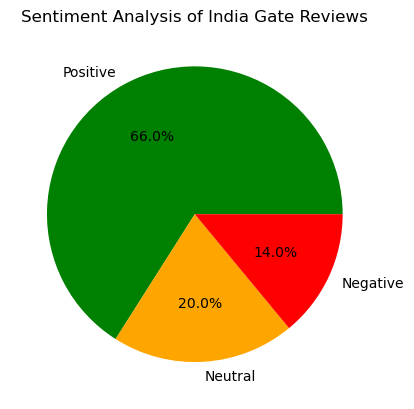

In [20]:
import matplotlib.pyplot as plt

sentiment_counts = data["VADER_Sentiment"].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=["green", "orange", "red"])
plt.title("Sentiment Analysis of India Gate Reviews")
plt.show()


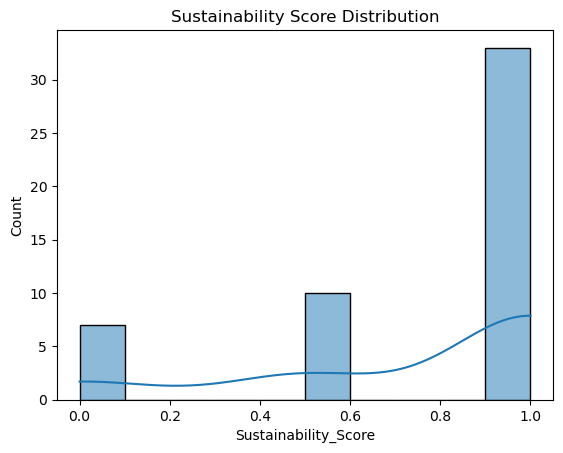

In [22]:
import seaborn as sns

sns.histplot(data["Sustainability_Score"], bins=10, kde=True)
plt.title("Sustainability Score Distribution")
plt.show()
